# Bitcoin Tweets Analysis

## Importing Libraries

In [1]:
import numpy             as np 
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md
sns.set_style("whitegrid")

### Let's Look at the dataset

In [2]:
data = pd.read_csv("bitcointweets.csv", lineterminator='\n')
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ChefSam,Sunshine State,Culinarian | Hot Sauce Artisan | Kombucha Brew...,2011-03-23 03:50:13,4680,2643,6232,False,2023-03-01 23:59:59,Which #bitcoin books should I think about read...,['bitcoin'],Twitter for iPhone,False
1,Roy⚡️,NaN,Truth-seeking pleb 📚 • Science 🧪 • Nature 🌱☀️ ...,2022-01-30 17:41:41,770,1145,9166,False,2023-03-01 23:59:47,"@ThankGodForBTC I appreciate the message, but ...",['Bitcoin'],Twitter for iPhone,False
2,Ethereum Yoda,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,2022-07-24 04:50:18,576,1,0,False,2023-03-01 23:59:42,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False
3,Viction,"Paris, France",https://t.co/8M3rgdjwEe\n\n#bitcoin #blockchai...,2010-03-26 10:15:26,236,1829,2195,False,2023-03-01 23:59:36,CoinDashboard v3.0 is here\nAvailable on ios a...,['Bitcoin'],Twitter for Android,False
4,Rosie,London,"The flower language of jasmine is loyalty, res...",2013-02-16 09:57:56,12731,46,134,False,2023-03-01 23:59:32,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"['Bitcoin', 'BTC']",Twitter Web App,False


In [3]:
data.shape

(169820, 13)

In [4]:

#1	user_name	The name of the user, as they’ve defined it.
#2	user_location	The user-defined location for this account’s profile.
#3	user_description	The user-defined UTF-8 string describing their account.
#4	user_created	Time and date, when the account was created.
#5	user_followers	The number of followers an account currently has.
#6	user_friends	The number of friends an account currently has.
#7	user_favourites	The number of favorites an account currently has
#8	user_verified	When true, indicates that the user has a verified account
#9	date	UTC time and date when the Tweet was created
#10	text	The actual UTF-8 text of the Tweet
#11	hashtags	All the other hashtags posted in the tweet along with #Bitcoin & #btc
#12	source	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web
#13	is_retweet	Indicates whether this Tweet has been Retweeted by the authenticating user.

In [5]:
#Dtypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169820 entries, 0 to 169819
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         169818 non-null  object
 1   user_location     84162 non-null   object
 2   user_description  158756 non-null  object
 3   user_created      169820 non-null  object
 4   user_followers    169820 non-null  int64 
 5   user_friends      169820 non-null  int64 
 6   user_favourites   169820 non-null  int64 
 7   user_verified     169820 non-null  bool  
 8   date              169820 non-null  object
 9   text              169820 non-null  object
 10  hashtags          169820 non-null  object
 11  source            169820 non-null  object
 12  is_retweet        169820 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 14.6+ MB


In [6]:
#Description of the dataset
data.describe()

,user_followers,user_friends,user_favourites
count,1.698200e+05,169820.000000,1.698200e+05
mean,1.059803e+04,771.285862,6.244843e+03
std,1.308698e+05,2677.149477,2.183433e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.190000e+02,9.000000,1.100000e+01
50%,5.460000e+02,122.000000,2.810000e+02
75%,1.956000e+03,606.000000,3.303000e+03
max,1.878937e+07,254276.000000,1.083014e+06


In [7]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(data.shape[0],data.shape[1]))

There are 169820 rows and 13 columns in the dataset.


In [33]:
data['user_location'] = data['user_location'].replace('USA', 'United States')

## Visualization

### 1. Word Cloud

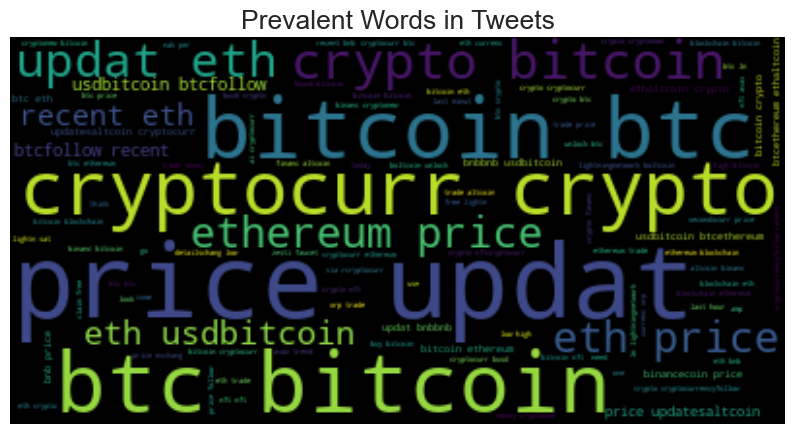

In [34]:
text = ",".join(i for i in data.text if 'https' not in i)

wordcloud = WordCloud(max_words = 200, background_color = "black").generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.title('Prevalent Words in Tweets', fontsize = 19)
plt.show()

### Number Of Tweets By Top 10 Locations

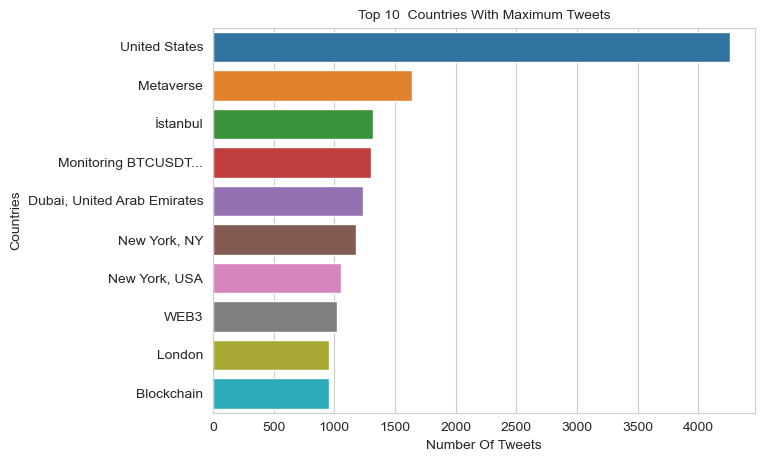

In [35]:
plt.figure(figsize = (7,5))

sns.barplot(x=data["user_location"].value_counts().values[0:10],
            y=data["user_location"].value_counts().index[0:10]);

plt.title("Top 10  Countries With Maximum Tweets", fontsize = 10)
plt.xlabel("Number Of Tweets", fontsize = 10)
plt.ylabel("Countries", fontsize = 10)
plt.show()

### 3. Heatmap representation of missing values

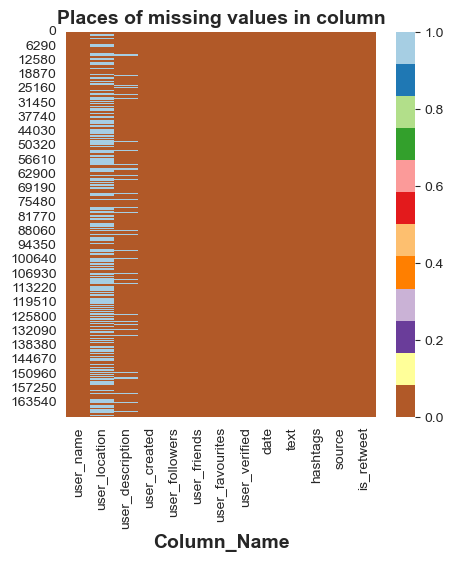

In [3]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size = 14, weight = "bold")
plt.title("Places of missing values in column", fontweight = "bold", size = 14)
plt.show()

### 4. Bar plot of unique values in each column

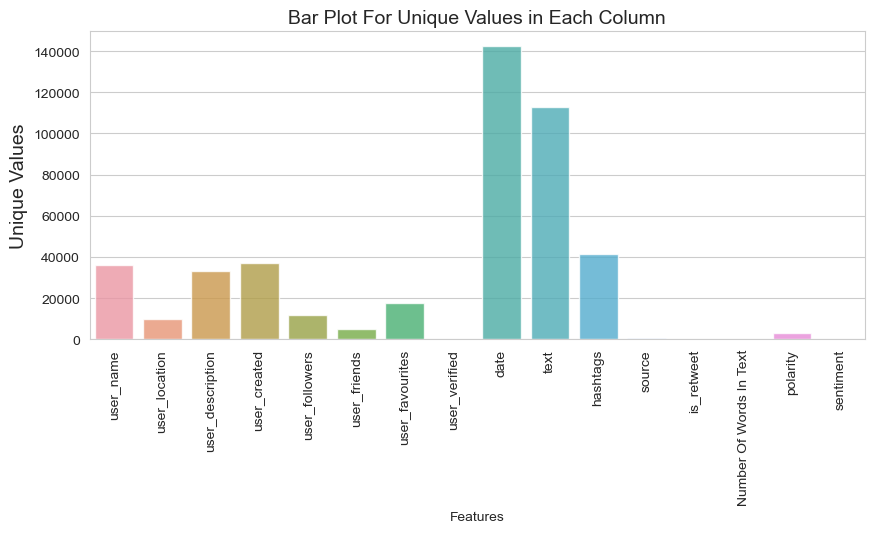

In [37]:
def UniqueValues(DataFrame):
    UniqueDataFrame = pd.DataFrame()
    UniqueDataFrame['Features'] = DataFrame.columns
    Uniques = []

    for col in DataFrame.columns:
        u = DataFrame[col].nunique()
        Uniques.append(u)
    UniqueDataFrame['Uniques'] = Uniques
    return UniqueDataFrame

udf = UniqueValues(data)

f, ax = plt.subplots(1,1, figsize = (10,4))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha = 0.8)
plt.title('Bar Plot For Unique Values in Each Column', fontsize = 14)
plt.ylabel('Unique Values', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 5. Distribution of words in text column

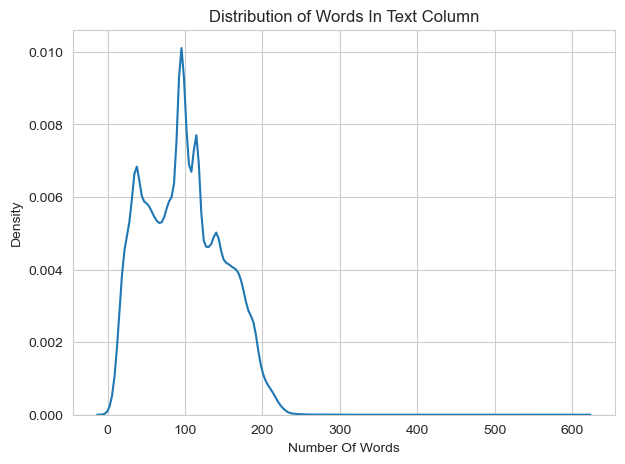

In [38]:
data["Number Of Words In Text"] = data["text"].apply(lambda x: len(x))

plt.figure(figsize = (7,5))
sns.kdeplot(data["Number Of Words In Text"])
plt.title("Distribution of Words In Text Column")
plt.xlabel("Number Of Words")
plt.show()

### 6. Users with maximum tweets(Top 20)

### 7. Plot verified users account

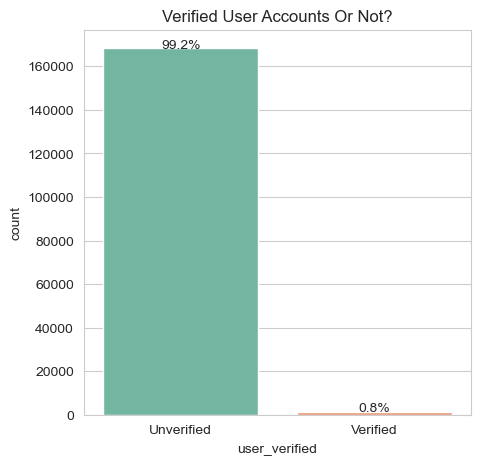

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
ax = sns.countplot(x="user_verified", data=data, palette="Set2")

plt.title("Verified User Accounts Or Not?")
plt.xticks([False, True], ['Unverified', 'Verified'])

total = float(len(data))  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.5,
            '{:.1%}'.format(height/total),
            ha="center")

plt.show()


### 8. Plot platform with maximum number of tweets

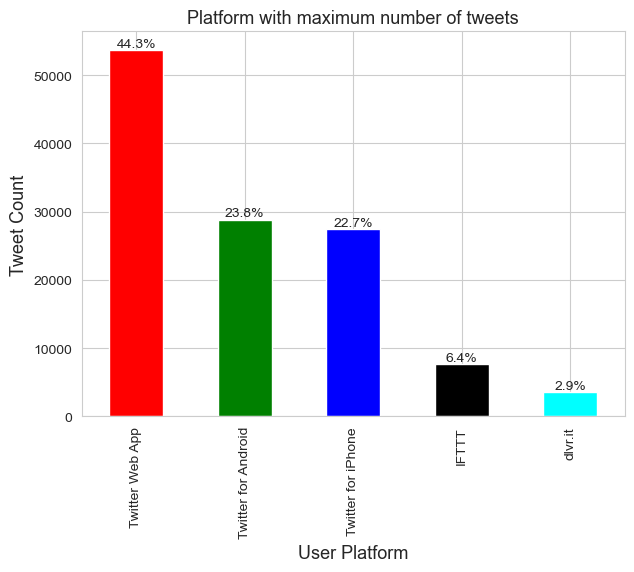

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# Counting the occurrences of each source and selecting the top 10
src = data['source'].value_counts().sort_values(ascending=False)
source = src.head(5)

# Plotting the bar chart
ax = source.plot.bar(color=['red', 'green', 'blue', 'black','cyan','pink','purple','violet','yellow','orange'])

plt.title('Platform with maximum number of tweets', size=13)
plt.xlabel('User Platform', size=13)
plt.ylabel('Tweet Count', size=13)

# Adding percentage labels above each bar
total = source.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


#### 8.1 Five Most Tweet Sources used in India

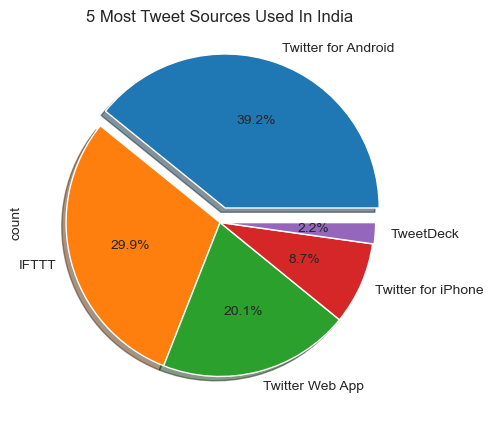

In [42]:
Ind = data['source'][data['user_location'] == 'India'].value_counts().sort_values(ascending=False)
explode = (0.1,0,0,0,0.01)
plt.figure(figsize=(5,5))
Ind[0:5].plot(kind = 'pie', title = "5 Most Tweet Sources Used In India", autopct='%1.1f%%', shadow=True, explode=explode)
plt.show()

#### 8.1 Five Most Tweet Sources used in USA

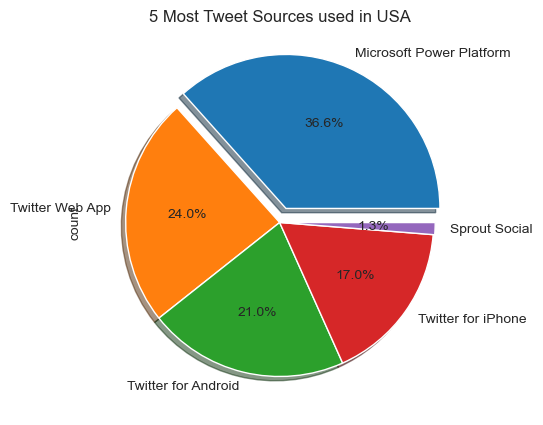

In [43]:
Usa = data['source'][data['user_location'] == 'United States'].value_counts().sort_values(ascending=False)
explode = (0.1,0,0,0,0.01)

plt.figure(figsize=(5,5))
Usa[0:5].plot(kind='pie', title='5 Most Tweet Sources used in USA', autopct='%1.1f%%', shadow=True, explode=explode)
plt.show()

#### 8.3 Five Most Tweet Sources used in United Kingdom

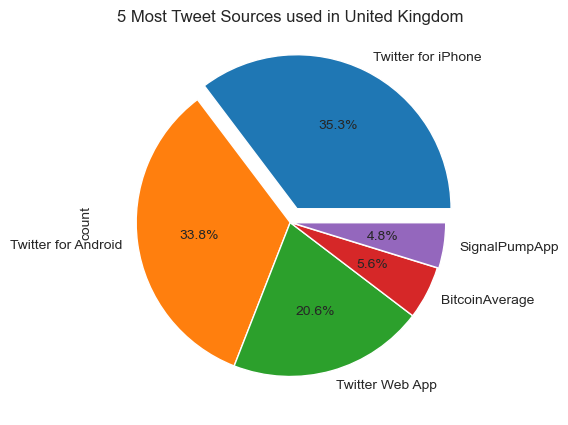

In [44]:
Uk = data['source'][data['user_location'] == 'United Kingdom'].value_counts().sort_values(ascending=False)
explode = (0.1,0,0,0,0.01)

plt.figure(figsize=(5,5))
Uk[0:5].plot(kind='pie', title = '5 Most Tweet Sources used in United Kingdom', explode=explode, autopct='%1.1f%%')
plt.show()

### 9. Plot top 5 hashtags

<Axes: title={'center': 'Top 5 Hashtags'}, ylabel='count'>

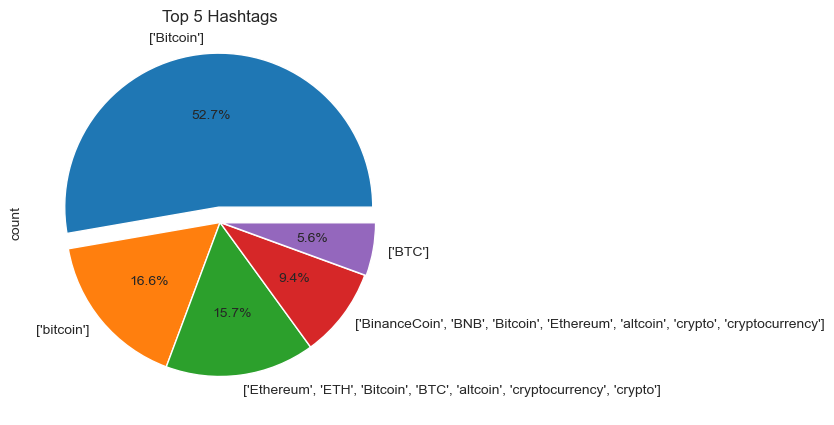

In [45]:
TopTags = data['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
explode = (0.1,0,0,0,0.01)
TopTags[0:5].plot(kind='pie', title='Top 5 Hashtags', autopct='%1.1f%%', explode=explode)

## Data Preprocessing

Now let us preprocess text using some NLP tchniques like:

1. converting to lowercase
2. remove text in square brackets,
3. remove links,
4. remove punctuation
5. remove words containing numbers
6. Removing Punctuation
7. Removing stopwords
8. Stemming
9. Lemmatization

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

def clean_text(text):

    '''Make text lowercase, Remove text in square brackets, Remove links, Remove punctuation
    and Remove words containing numbers.'''

    text = text.lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('https?://\S+|www\.\S+', '',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    #Removing Stopwords
    text = " ".join([word for word in str(text).split() if word not in stop_words])

    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

data['text'] = data['text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SACHIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SACHIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SACHIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Removing Emojis

In [47]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['text']=data['text'].apply(lambda x: remove_emoji(x))

In [48]:
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Number Of Words In Text,polarity,sentiment
0,ChefSam,Sunshine State,Culinarian | Hot Sauce Artisan | Kombucha Brew...,2011-03-23 03:50:13,4680,2643,6232,False,2023-03-01 23:59:59,bitcoin book think read next,['bitcoin'],Twitter for iPhone,False,28,0.00,Neutral
1,Roy⚡️,NaN,Truth-seeking pleb 📚 • Science 🧪 • Nature 🌱☀️ ...,2022-01-30 17:41:41,770,1145,9166,False,2023-03-01 23:59:47,thankgodforbtc appreci messag fan religi refer...,['Bitcoin'],Twitter for iPhone,False,68,0.00,Neutral
2,Ethereum Yoda,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,2022-07-24 04:50:18,576,1,0,False,2023-03-01 23:59:42,ethereum price updat eth usdbitcoin btcfollow ...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False,95,0.00,Neutral
3,Viction,"Paris, France",https://t.co/8M3rgdjwEe\n\n#bitcoin #blockchai...,2010-03-26 10:15:26,236,1829,2195,False,2023-03-01 23:59:36,coindashboard hereavail io androidbitcoin,['Bitcoin'],Twitter for Android,False,41,0.00,Neutral
4,Rosie,London,"The flower language of jasmine is loyalty, res...",2013-02-16 09:57:56,12731,46,134,False,2023-03-01 23:59:32,bitcoin short term fractal lower timefram btc ...,"['Bitcoin', 'BTC']",Twitter Web App,False,98,0.05,Positive


In [49]:
def SentimentChecker (newTweets):
    newDF = pd.DataFrame(columns = ['text', 'subjectivity', 'polarity', 'sentiment'])
    for i in newTweets:
        blob = TextBlob(i) #Create TextBlob Object of a Tweet
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity

        if pol>0:
            sent = "Positive"
        elif pol<0:
            sent = "Negative"
        else:
            sent = "Neutral"

        #Create a row for dataframe
        row = [i, sub, pol, sent]

        #Add a row to dataframe
        newDF.loc[len(newDF)] = row #len(newDF) gives you no. of entries you have. So, Overall it helps to find the next available row to insert
    return newDF

In [50]:
def JointPlotter(newDF):
    #Create jointplot for polarity and subjectivity of twitter tweets.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()

    SentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    SentimentCounts = SentimentCounts.rename({'sentiment': 'count'}, axis=1)
    SentimentCounts["sentiment"] = SentimentCounts.index

    sns.barplot(data = SentimentCounts, x="sentiment", y="count") #Create Barplot of Sentiment Count

    plt.show()
    

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def JointPlotter(newDF):
    # Create jointplot for polarity and subjectivity of twitter tweets.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()

    SentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    SentimentCounts = SentimentCounts.rename({'sentiment': 'count'}, axis=1)
    SentimentCounts["sentiment"] = SentimentCounts.index

    # Create Barplot of Sentiment Count with percentage labels
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=SentimentCounts, x="sentiment", y="count")

    total = SentimentCounts["count"].sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Counts')
    plt.show()

# Example usage:
# JointPlotter(newDF)


In [52]:
def visualizer(subset):
    #Create frequency distribution for "subset"
    fdist = nltk.FreqDist()
    for i in subset["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j]+=1
    fdist.plot(30, cumulative=False)

    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

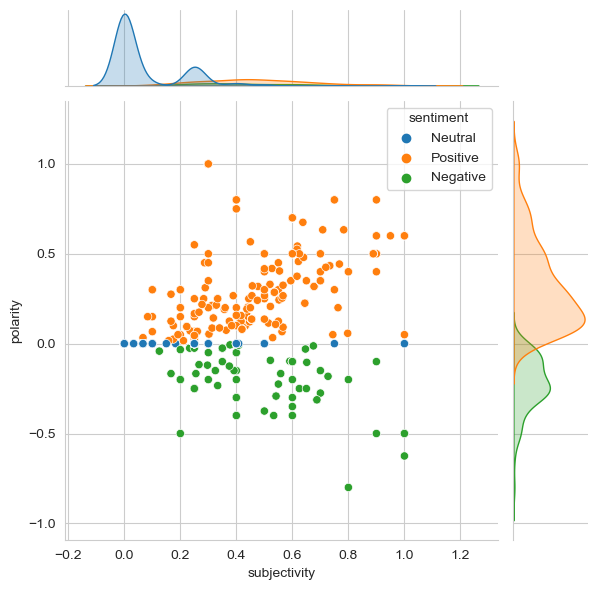

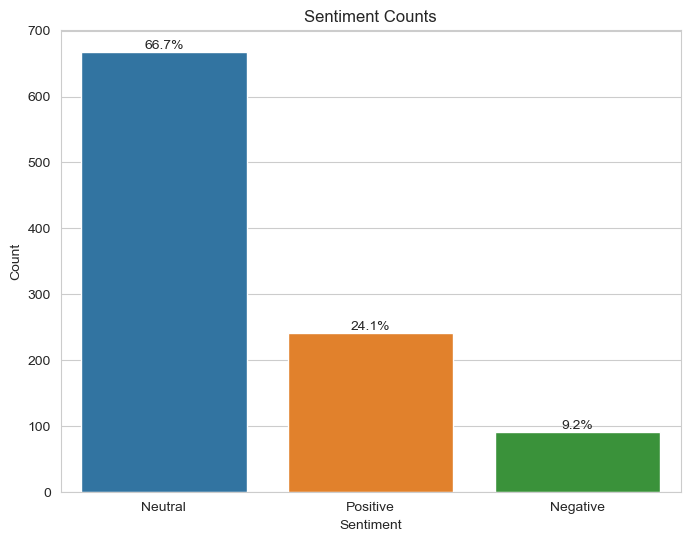

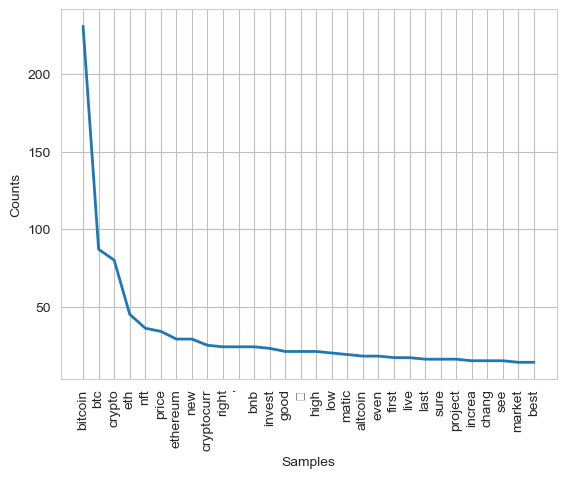

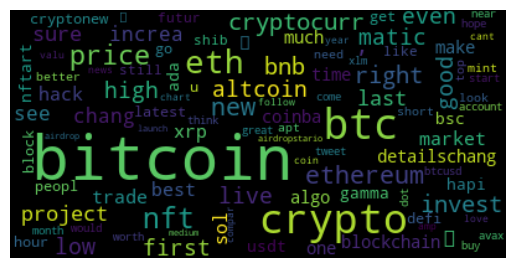

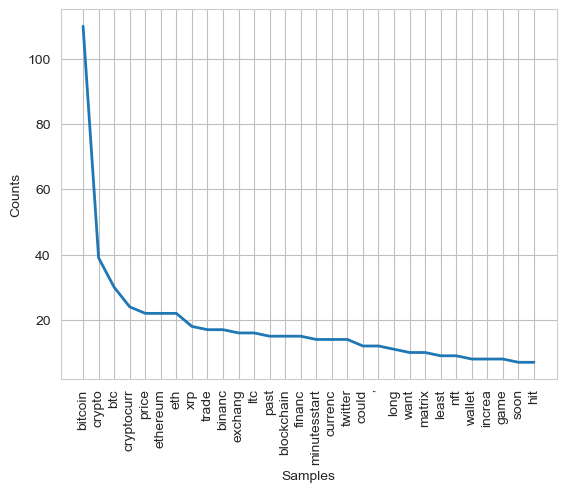

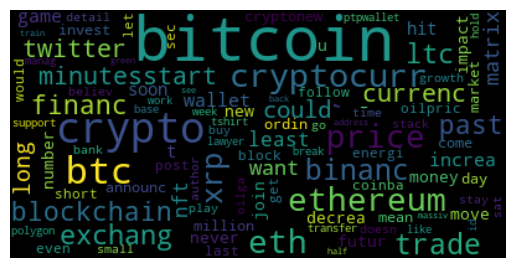

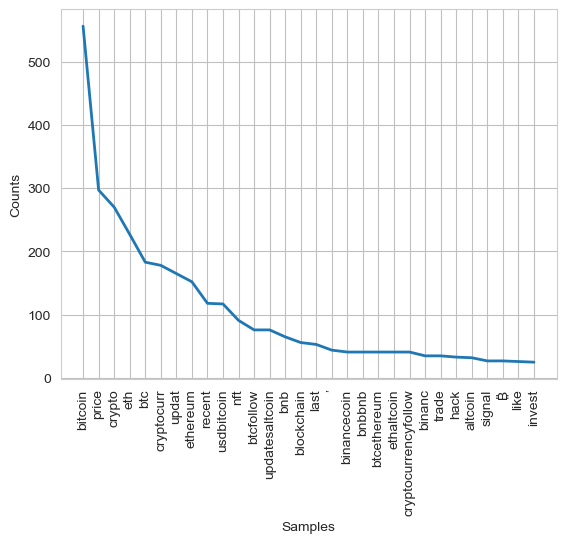

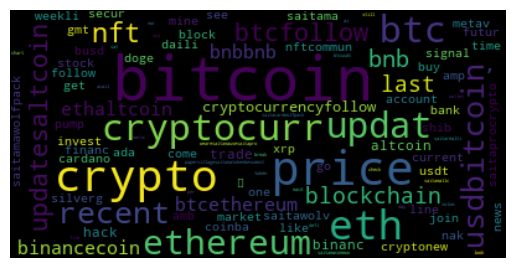

In [53]:
CleanTweets = data['text'].head(1000)
SentimentDF = SentimentChecker(CleanTweets)
JointPlotter(SentimentDF)

#Call visualiser function to plot a wordcloud and a frequency distribution
visualizer(SentimentDF[SentimentDF["sentiment"] == "Positive"])
visualizer(SentimentDF[SentimentDF["sentiment"] == "Negative"])
visualizer(SentimentDF[SentimentDF["sentiment"] == "Neutral"])

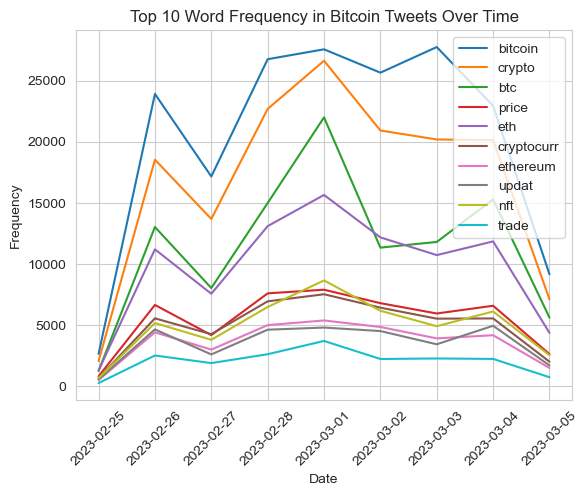

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Group tweets by date and aggregate text into a single string
tweets_by_date = data.groupby(pd.Grouper(key='date', freq='D'))['text'].apply(' '.join).reset_index()

# Perform text preprocessing (e.g., lowercase, remove punctuation, etc.)

# Count word frequency
word_freq = tweets_by_date['text'].str.split(expand=True).stack().value_counts()

# Plot word frequency over time for top 10 prevalent words
top_words = word_freq.head(10).index.tolist()
for word in top_words:
    word_counts = tweets_by_date['text'].str.count(word)
    plt.plot(tweets_by_date['date'], word_counts, label=word)

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequency in Bitcoin Tweets Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()
